In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Pickle package
import pickle

In [2]:
# Allows charts to appear in the notebook
%matplotlib inline

In [3]:
# Pandas - Reading Texla features
texla = pd.read_csv('ml_texla_python_svm_1.csv')
texla

,Colour,BHP,Mileage,Charge,Stroke,Cylinder,Engine,Nitro,Wing
0,Black,159,28,23,7,5,2,0,0
1,Black,144,27,212,6,9,1,0,0
2,Black,147,29,218,6,4,1,0,0
3,Black,145,26,217,17,8,1,0,0
4,Black,150,25,212,6,5,2,1,0
5,Black,165,27,23,7,5,2,1,0
6,Black,154,27,27,5,5,2,0,0
7,Black,146,26,210,10,4,1,0,0
8,Black,152,27,217,8,6,1,0,0
9,Black,151,27,217,11,4,1,0,0


In [4]:
texla.describe()

,BHP,Mileage,Charge,Stroke,Cylinder,Engine,Nitro,Wing
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,145.950000,24.90000,190.100000,11.000000,7.200000,1.300000,0.500000,0.0
std,8.344396,2.33734,71.630558,4.801316,3.019237,0.732695,0.512989,0.0
min,134.000000,21.00000,23.000000,5.000000,4.000000,0.000000,0.000000,0.0
25%,138.750000,23.00000,212.000000,7.000000,5.000000,1.000000,0.000000,0.0
50%,146.500000,24.50000,217.000000,10.000000,6.000000,1.000000,0.500000,0.0
75%,150.250000,27.00000,223.000000,14.250000,9.000000,2.000000,1.000000,0.0
max,165.000000,29.00000,231.000000,20.000000,14.000000,3.000000,1.000000,0.0


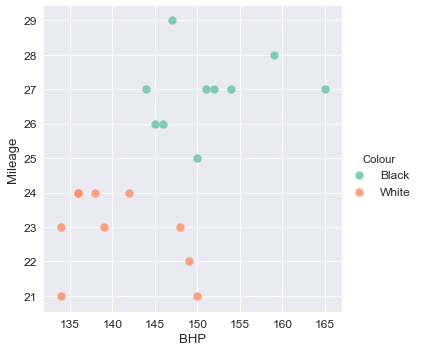

In [5]:
# Classified based on the two colours
sns.lmplot('BHP', 'Mileage', texla, hue='Colour',
           palette='Set2', fit_reg=False, scatter_kws={"s": 70});

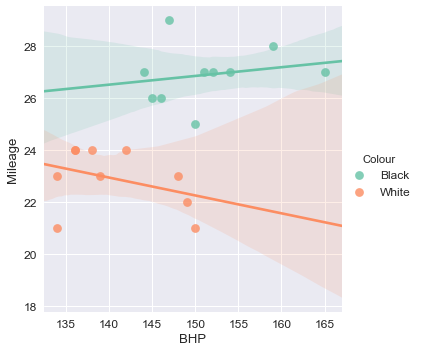

In [6]:
# Classified based on the two colours
sns.lmplot('BHP', 'Mileage', texla, hue='Colour',
           palette='Set2', fit_reg=True, scatter_kws={"s": 77});

In [7]:
# Specify inputs for the model
params = texla[['BHP','Mileage']].values
type_label = np.where(texla['Colour']=='Black', 0, 1)

params, type_label

(array([[159,  28],
        [144,  27],
        [147,  29],
        [145,  26],
        [150,  25],
        [165,  27],
        [154,  27],
        [146,  26],
        [152,  27],
        [151,  27],
        [149,  22],
        [150,  21],
        [134,  21],
        [139,  23],
        [138,  24],
        [142,  24],
        [136,  24],
        [148,  23],
        [136,  24],
        [134,  23]], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [8]:
# Feature names
texla_features = texla.columns.values[1:].tolist()
texla_features

['BHP', 'Mileage', 'Charge', 'Stroke', 'Cylinder', 'Engine', 'Nitro', 'Wing']

In [9]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(params, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(200, 120)
yy = a * xx - (model.intercept_[0]) / w[1]

xx, yy

(array([200.        , 198.36734694, 196.73469388, 195.10204082,
        193.46938776, 191.83673469, 190.20408163, 188.57142857,
        186.93877551, 185.30612245, 183.67346939, 182.04081633,
        180.40816327, 178.7755102 , 177.14285714, 175.51020408,
        173.87755102, 172.24489796, 170.6122449 , 168.97959184,
        167.34693878, 165.71428571, 164.08163265, 162.44897959,
        160.81632653, 159.18367347, 157.55102041, 155.91836735,
        154.28571429, 152.65306122, 151.02040816, 149.3877551 ,
        147.75510204, 146.12244898, 144.48979592, 142.85714286,
        141.2244898 , 139.59183673, 137.95918367, 136.32653061,
        134.69387755, 133.06122449, 131.42857143, 129.79591837,
        128.16326531, 126.53061224, 124.89795918, 123.26530612,
        121.63265306, 120.        ]),
 array([13.8       , 14.12653061, 14.45306122, 14.77959184, 15.10612245,
        15.43265306, 15.75918367, 16.08571429, 16.4122449 , 16.73877551,
        17.06530612, 17.39183673, 17.71836735, 1

In [11]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

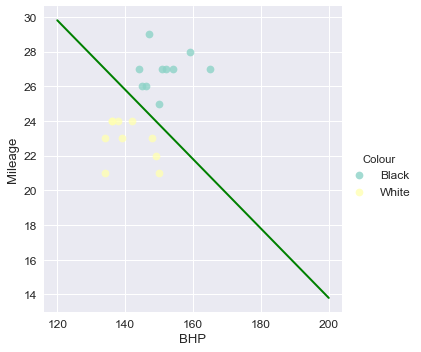

In [12]:
# Plot the hyperplane
sns.lmplot('BHP', 'Mileage', data=texla, hue='Colour', palette='Set3', fit_reg=False, scatter_kws={"s": 60})
plt.plot(xx, yy, linewidth=2, color='green');

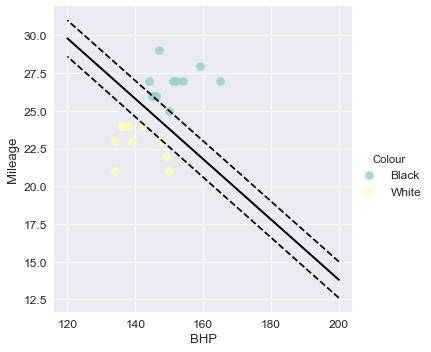

In [13]:
# Look at the margins and support vectors
sns.lmplot('BHP', 'Mileage', data=texla, hue='Colour', palette='Set3', fit_reg=False, scatter_kws={"s": 77})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

## Prediction

In [14]:
# Create a function to predict
def black_or_white(bhp, mileage):
    if(model.predict([[bhp, mileage]]))==0:
        print('Black Tesla!!')
    else:
        print('White Tesla!!')

In [15]:
black_or_white(165, 30)

Black Tesla!!


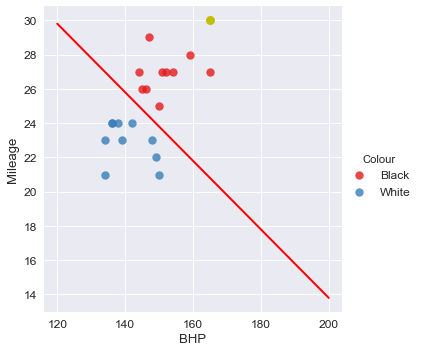

In [16]:
# Plot the point to visually see where the point lies
sns.lmplot('BHP', 'Mileage', data=texla, hue='Colour', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='red')
plt.plot(165, 30, 'yo', markersize='9');

### Regularisation or Misclassification 

Added below line to the csv <BR/> 
Alternately create a new csv file
`Black,140,24.5,223,11,13,0,1,0`

In [17]:
texla2 = pd.read_csv('ml_texla_python_svm_2.csv')
texla2

,Colour,BHP,Mileage,Charge,Stroke,Cylinder,Engine,Nitro,Wing
0,Black,159,28.0,23,7,5,2,0,0
1,Black,144,27.0,212,6,9,1,0,0
2,Black,147,29.0,218,6,4,1,0,0
3,Black,145,26.0,217,17,8,1,0,0
4,Black,150,25.0,212,6,5,2,1,0
5,Black,165,27.0,23,7,5,2,1,0
6,Black,154,27.0,27,5,5,2,0,0
7,Black,146,26.0,210,10,4,1,0,0
8,Black,152,27.0,217,8,6,1,0,0
9,Black,151,27.0,217,11,4,1,0,0


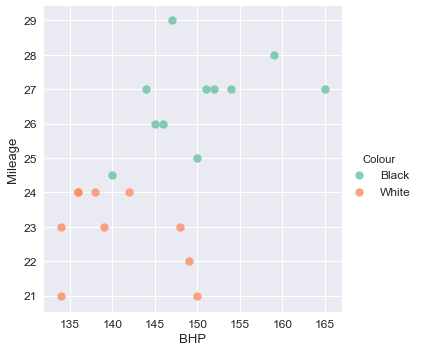

In [18]:
# Classified based on the two colours
sns.lmplot('BHP', 'Mileage', texla2, hue='Colour',
           palette='Set2', fit_reg=False, scatter_kws={"s": 70});

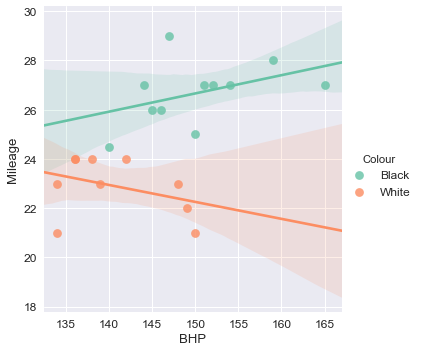

In [19]:
# Classified based on the two colours
sns.lmplot('BHP', 'Mileage', texla2, hue='Colour',
           palette='Set2', fit_reg=True, scatter_kws={"s": 77});

In [20]:
# Specify inputs for the model
params2 = texla2[['BHP','Mileage']].values
type_label2 = np.where(texla2['Colour']=='Black', 0, 1)

params2, type_label2

(array([[159. ,  28. ],
        [144. ,  27. ],
        [147. ,  29. ],
        [145. ,  26. ],
        [150. ,  25. ],
        [165. ,  27. ],
        [154. ,  27. ],
        [146. ,  26. ],
        [152. ,  27. ],
        [151. ,  27. ],
        [149. ,  22. ],
        [150. ,  21. ],
        [134. ,  21. ],
        [139. ,  23. ],
        [138. ,  24. ],
        [142. ,  24. ],
        [136. ,  24. ],
        [148. ,  23. ],
        [136. ,  24. ],
        [134. ,  23. ],
        [140. ,  24.5]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]))

In [21]:
# Feature names (Texla 2)
texla2_features = texla2.columns.values[1:].tolist()
texla2_features

['BHP', 'Mileage', 'Charge', 'Stroke', 'Cylinder', 'Engine', 'Nitro', 'Wing']

In [22]:
# Fit the SVM model
model2 = svm.SVC(kernel='linear')
model2.fit(params2, type_label2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
# Get the separating hyperplane
w = model2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(200, 120)
yy = a * xx - (model2.intercept_[0]) / w[1]

xx, yy

(array([200.        , 198.36734694, 196.73469388, 195.10204082,
        193.46938776, 191.83673469, 190.20408163, 188.57142857,
        186.93877551, 185.30612245, 183.67346939, 182.04081633,
        180.40816327, 178.7755102 , 177.14285714, 175.51020408,
        173.87755102, 172.24489796, 170.6122449 , 168.97959184,
        167.34693878, 165.71428571, 164.08163265, 162.44897959,
        160.81632653, 159.18367347, 157.55102041, 155.91836735,
        154.28571429, 152.65306122, 151.02040816, 149.3877551 ,
        147.75510204, 146.12244898, 144.48979592, 142.85714286,
        141.2244898 , 139.59183673, 137.95918367, 136.32653061,
        134.69387755, 133.06122449, 131.42857143, 129.79591837,
        128.16326531, 126.53061224, 124.89795918, 123.26530612,
        121.63265306, 120.        ]),
 array([18.89988326, 19.06314857, 19.22641388, 19.38967918, 19.55294449,
        19.7162098 , 19.8794751 , 20.04274041, 20.20600571, 20.36927102,
        20.53253633, 20.69580163, 20.85906694, 2

In [24]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model2.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model2.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

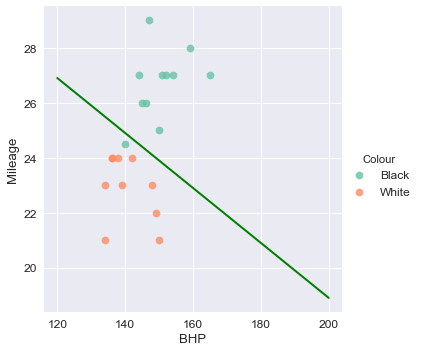

In [25]:
# Plot the hyperplane
sns.lmplot('BHP', 'Mileage', data=texla2, hue='Colour', palette='Set2', fit_reg=False, scatter_kws={"s": 60})
plt.plot(xx, yy, linewidth=2, color='green');

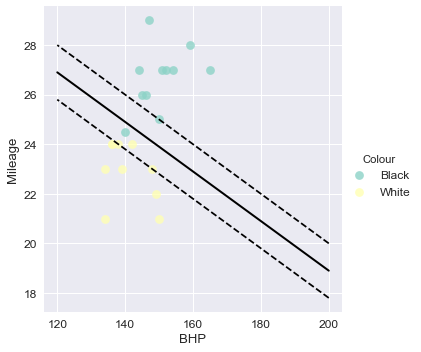

In [26]:
# Look at the margins and support vectors
sns.lmplot('BHP', 'Mileage', data=texla2, hue='Colour', palette='Set3', fit_reg=False, scatter_kws={"s": 77})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model2.support_vectors_[:, 0], model2.support_vectors_[:, 1], 
            s=80, facecolors='none');

In [27]:
# Fit the SVM model
model3 = svm.SVC(kernel='linear', C=0.1)
model3.fit(params2, type_label2)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
# Get the separating hyperplane
w = model3.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(200, 120)
yy = a * xx - (model3.intercept_[0]) / w[1]

xx, yy

(array([200.        , 198.36734694, 196.73469388, 195.10204082,
        193.46938776, 191.83673469, 190.20408163, 188.57142857,
        186.93877551, 185.30612245, 183.67346939, 182.04081633,
        180.40816327, 178.7755102 , 177.14285714, 175.51020408,
        173.87755102, 172.24489796, 170.6122449 , 168.97959184,
        167.34693878, 165.71428571, 164.08163265, 162.44897959,
        160.81632653, 159.18367347, 157.55102041, 155.91836735,
        154.28571429, 152.65306122, 151.02040816, 149.3877551 ,
        147.75510204, 146.12244898, 144.48979592, 142.85714286,
        141.2244898 , 139.59183673, 137.95918367, 136.32653061,
        134.69387755, 133.06122449, 131.42857143, 129.79591837,
        128.16326531, 126.53061224, 124.89795918, 123.26530612,
        121.63265306, 120.        ]),
 array([14.45471801, 14.75156402, 15.04841003, 15.34525604, 15.64210205,
        15.93894807, 16.23579408, 16.53264009, 16.8294861 , 17.12633211,
        17.42317812, 17.72002413, 18.01687014, 1

In [29]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model3.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model3.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

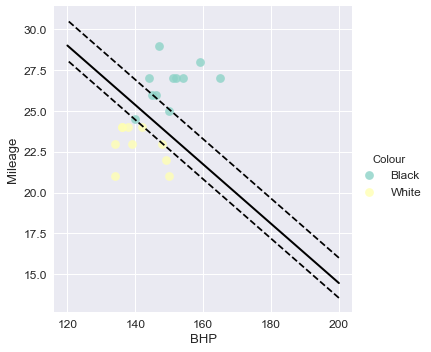

In [30]:
# Look at the margins and support vectors
sns.lmplot('BHP', 'Mileage', data=texla2, hue='Colour', palette='Set3', fit_reg=False, scatter_kws={"s": 77})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model3.support_vectors_[:, 0], model3.support_vectors_[:, 1], 
            s=80, facecolors='none');

### Cost of misclassification

C is the cost of misclassification. <br/>

A large C gives you low bias and high variance; low bias because you penalize the cost of misclassification a lot. A small C gives you higher bias and lower variance.

In [31]:
# Create a function to predict
def black_or_white2(bhp, mileage):
    if(model2.predict([[bhp, mileage]]))==0:
        print('Black Tesla!!')
    else:
        print('White Tesla!!')

In [32]:
black_or_white2(165,30)

Black Tesla!!


### The model (with one mis-classification) is able to predict accurately for the same input

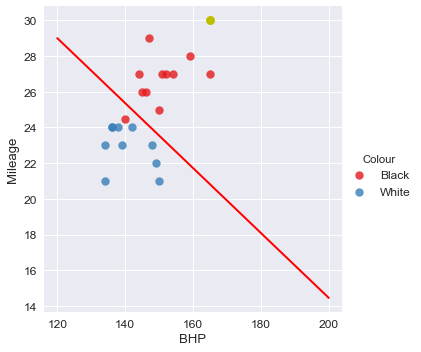

In [33]:
# Plot the point to visually see where the point lies
sns.lmplot('BHP', 'Mileage', data=texla2, hue='Colour', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='red')
plt.plot(165, 30, 'yo', markersize='9');

## What will happen when we give a value closer/same as the misclassified?

In [34]:
black_or_white2(140, 25)

Black Tesla!!


In [35]:
black_or_white2(140, 24)

White Tesla!!


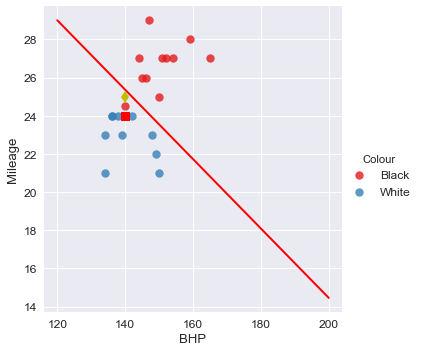

In [36]:
# Plot the point to visually see where the point lies
sns.lmplot('BHP', 'Mileage', data=texla2, hue='Colour', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='red')
plt.plot(140, 25, 'yd', markersize='9'); #black
plt.plot(140, 24, 'rs', markersize='9'); #white

# Pickle

In [37]:
b_or_w_texla_dict = {'texla_model': model, 'texla_features': ['BHP','Mileage'], 'full_features': texla_features}

In [38]:
b_or_w_texla_dict

{'full_features': ['BHP',
  'Mileage',
  'Charge',
  'Stroke',
  'Cylinder',
  'Engine',
  'Nitro',
  'Wing'],
 'texla_features': ['BHP', 'Mileage'],
 'texla_model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)}

In [39]:
# Pickle
pickle.dump(b_or_w_texla_dict, open("b_or_w_texla_dict.pkl", "wb"))

In [40]:
pickle.dumps(b_or_w_texla_dict)

b'\x80\x03}q\x00(X\x0b\x00\x00\x00texla_modelq\x01csklearn.svm.classes\nSVC\nq\x02)\x81q\x03}q\x04(X\x17\x00\x00\x00decision_function_shapeq\x05X\x03\x00\x00\x00ovrq\x06X\x05\x00\x00\x00_implq\x07X\x05\x00\x00\x00c_svcq\x08X\x06\x00\x00\x00kernelq\tX\x06\x00\x00\x00linearq\nX\x06\x00\x00\x00degreeq\x0bK\x03X\x05\x00\x00\x00gammaq\x0cX\x04\x00\x00\x00autoq\rX\x05\x00\x00\x00coef0q\x0eG\x00\x00\x00\x00\x00\x00\x00\x00X\x03\x00\x00\x00tolq\x0fG?PbM\xd2\xf1\xa9\xfcX\x01\x00\x00\x00Cq\x10G?\xf0\x00\x00\x00\x00\x00\x00X\x02\x00\x00\x00nuq\x11G\x00\x00\x00\x00\x00\x00\x00\x00X\x07\x00\x00\x00epsilonq\x12G\x00\x00\x00\x00\x00\x00\x00\x00X\t\x00\x00\x00shrinkingq\x13\x88X\x0b\x00\x00\x00probabilityq\x14\x89X\n\x00\x00\x00cache_sizeq\x15K\xc8X\x0c\x00\x00\x00class_weightq\x16NX\x07\x00\x00\x00verboseq\x17\x89X\x08\x00\x00\x00max_iterq\x18J\xff\xff\xff\xffX\x0c\x00\x00\x00random_stateq\x19NX\x07\x00\x00\x00_sparseq\x1a\x89X\r\x00\x00\x00class_weight_q\x1bcnumpy.core.multiarray\n_reconstruct\nq\x1

#### Summary

C controls the cost of misclassification on the training data. (Regularisation parameter)

The goal of SVM is to find a hyper plane that would leave the widest possible "cushion" between input points from two classes. There is a trade-off between "narrow cushion, little / no mistakes" and "wide cushion, quite a few mistakes".

Learning algorithms are about generalizing from input data, not explaining it. This is not to mention that, "thanks to" the curse of dimensionality, in large number of dimensions training data can often be explained quite well by over fitting the model.

Therefore, often times it is desirable to specifically allow some training points to be misclassified in order to have an "overall better" position of the separating hyper plane.

•	Mathematically, "better" translates to "optimizing cost function valuing mistakes with certain coefficient".
•	Intuitively, "better" implies "wider cushion, a few mistakes allowed".
•	Practically "better" is to be understood as "performs well on real data".

Small C makes the cost of misclassification low ("soft margin"), thus allowing more of them for the sake of wider "cushion".

Large C makes the cost of misclassification high ('hard margin"), thus forcing the algorithm to explain the input data stricter and potentially overfit.

The goal is to find the balance between "not too strict" and "not too loose". Cross-validation and resampling, along with grid search, are good ways to finding the best C.
